In [96]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

c:\users\dhivya\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

ImportError: numpy.core.multiarray failed to import

In [77]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Dhivya\Desktop\mydata.csv',delimiter=',',encoding='latin-1')
df.head()
trainDF = pd.DataFrame()
trainDF['text'] = df.component
trainDF['label'] = df. classes

In [78]:
# split the dataset into training and validation datasets 
train_x, valid_x, train_y, valid_y = model_selection.train_test_split(df.component, df.classes)

# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y)
valid_y = encoder.fit_transform(valid_y)

In [61]:
# Dont run this
token = []
for line in componentName:
    token.append(line.split(''))
print(token)
with open(r'data.csv', 'w',encoding='latin-1') as csvFile:
    writer = csv.writer(csvFile)
    writer.writerows(token)
csvFile.close()

[['Oxygen content in Intravascular space'], ['Oxygen content in Aorta root'], ['Oxygen content in Left atrium'], ['Oxygen content in Right atrium'], ['Oxygen content in High right atrium'], ['Oxygen content in Low right atrium'], ['Oxygen content in Mid right atrium'], ['Oxygen content in Left ventricle'], ['Oxygen content in Right ventricular outflow tract'], ['Oxygen content in Right ventricle'], ['Oxygen content in Coronary sinus'], ['Oxygen content in Ductus arteriosus'], ['Oxygen content in Inferior vena cava'], ['Oxygen content in Left pulmonary artery'], ['Oxygen content in Main pulmonary artery'], ['Oxygen content in Right pulmonary artery'], ['Oxygen content in Pulmonary wedge'], ['Oxygen content in Superior vena cava'], ['Eosinophils/100 leukocytes in Sputum by Manual count'], ['Lymphocytes/100 leukocytes in Cerebral spinal fluid by Manual count'], ['Monocytes/100 leukocytes in Cerebral spinal fluid by Manual count'], ['Monocytes/100 leukocytes in Body fluid by Manual count']

In [79]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(trainDF['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(train_x)
xvalid_count =  count_vect.transform(valid_x)


In [80]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=5000)
tfidf_vect.fit(trainDF['text'])
xtrain_tfidf =  tfidf_vect.transform(train_x)
xvalid_tfidf =  tfidf_vect.transform(valid_x)

# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram.fit(trainDF['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(train_x)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(valid_x)

# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=5000)
tfidf_vect_ngram_chars.fit(trainDF['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(train_x) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(valid_x) 

In [86]:
# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open(r'C:/Users/Dhivya/Desktop/wiki-news-300d-1M.vec/wiki-news-300d-1M.vec',encoding = "utf-8")):
    values = line.split()
    embeddings_index[values[0]] = numpy.asarray(values[1:], dtype='float32')

# create a tokenizer 
token = text.Tokenizer()
token.fit_on_texts(trainDF['text'])
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = numpy.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [87]:
def train_model(classifier, feature_vector_train, label, feature_vector_valid, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    return metrics.accuracy_score(predictions, valid_y)

In [88]:
# Naive Bayes on Count Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count)
print("NB, Count Vectors: ", accuracy)

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf)
print("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("NB, CharLevel Vectors: ", accuracy)

NB, Count Vectors:  0.988550866863
NB, WordLevel TF-IDF:  0.990350016356
NB, N-Gram Vectors:  0.942427216225
NB, CharLevel Vectors:  0.975793261367


In [89]:
# Linear Classifier on Count Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_count, train_y, xvalid_count)
print("LR, Count Vectors: ", accuracy)

# Linear Classifier on Word Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf)
print("LR, WordLevel TF-IDF: ", accuracy)

# Linear Classifier on Ngram Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("LR, N-Gram Vectors: ", accuracy)

# Linear Classifier on Character Level TF IDF Vectors
accuracy = train_model(linear_model.LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars)
print("LR, CharLevel Vectors: ", accuracy)

LR, Count Vectors:  0.99084069349
LR, WordLevel TF-IDF:  0.991331370625
LR, N-Gram Vectors:  0.987733071639
LR, CharLevel Vectors:  0.99084069349


In [90]:
# SVM on Ngram Level TF IDF Vectors
accuracy = train_model(svm.SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram)
print("SVM, N-Gram Vectors: ", accuracy)

SVM, N-Gram Vectors:  0.537455021263


In [91]:
# RF on Count Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count)
print("RF, Count Vectors: ", accuracy)

# RF on Word Level TF IDF Vectors
accuracy = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf)
print("RF, WordLevel TF-IDF: ", accuracy)

NameError: name 'ensemble' is not defined

In [92]:
# Extereme Gradient Boosting on Count Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_count.tocsc(), train_y, xvalid_count.tocsc())
print("Xgb, Count Vectors: ", accuracy)

# Extereme Gradient Boosting on Word Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf.tocsc(), train_y, xvalid_tfidf.tocsc())
print("Xgb, WordLevel TF-IDF: ", accuracy)

# Extereme Gradient Boosting on Character Level TF IDF Vectors
accuracy = train_model(xgboost.XGBClassifier(), xtrain_tfidf_ngram_chars.tocsc(), train_y, xvalid_tfidf_ngram_chars.tocsc())
print("Xgb, CharLevel Vectors: ", accuracy)

Xgb, Count Vectors:  0.976938174681
Xgb, WordLevel TF-IDF:  0.976938174681
Xgb, CharLevel Vectors:  0.98233562316


In [93]:
def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    return classifier 

classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
accuracy = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, is_neural_net=True)
print("NN, Ngram Level TF IDF Vectors",  accuracy)

Epoch 1/1
18341/18341 [==============================] - 9s 467us/step - loss: 0.1427
NN, Ngram Level TF IDF Vectors 0.462544978737


In [94]:
def create_cnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_cnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print("CNN, Word Embeddings",  accuracy)

Epoch 1/1
18341/18341 [==============================] - 35s 2ms/step - loss: 0.0830
CNN, Word Embeddings 0.462544978737


In [99]:

def create_rnn_lstm():

    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_lstm()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print( "RNN-LSTM, Word Embeddings",  accuracy)


Epoch 1/1
18341/18341 [==============================] - 86s 5ms/step - loss: 0.1051
RNN-LSTM, Word Embeddings 0.462544978737


In [100]:
def create_rnn_gru():

    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the GRU Layer
    lstm_layer = layers.GRU(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_rnn_gru()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-GRU, Word Embeddings",  accuracy)


Epoch 1/1
18341/18341 [==============================] - 64s 3ms/step - loss: 0.1048
RNN-GRU, Word Embeddings 0.462544978737


In [101]:
def create_bidirectional_rnn():

    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy')
    
    return model

classifier = create_bidirectional_rnn()
accuracy = train_model(classifier, train_seq_x, train_y, valid_seq_x, is_neural_net=True)
print ("RNN-Bidirectional, Word Embeddings",  accuracy)

Epoch 1/1
18341/18341 [==============================] - 119s 6ms/step - loss: 0.1022
RNN-Bidirectional, Word Embeddings 0.462544978737


In [106]:
classifier.predict(model('glucose'))

TypeError: 'Word2Vec' object is not callable

In [1]:
from gensim.models import Word2Vec

c:\users\dhivya\appdata\local\programs\python\python35\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [4]:
from nltk import word_tokenize
import pandas as pd

In [6]:
df = pd.read_csv(r'C:\Users\Dhivya\Desktop\testpanelonly.csv',delimiter=',',encoding='latin-1')

In [7]:
componentName = df.component

In [9]:
token = []
for line in componentName:
    token.append(line.split(' '))
print(token)

[['Oxygen', 'content', 'in', 'Intravascular', 'space'], ['Oxygen', 'content', 'in', 'Aorta', 'root'], ['Oxygen', 'content', 'in', 'Left', 'atrium'], ['Oxygen', 'content', 'in', 'Right', 'atrium'], ['Oxygen', 'content', 'in', 'High', 'right', 'atrium'], ['Oxygen', 'content', 'in', 'Low', 'right', 'atrium'], ['Oxygen', 'content', 'in', 'Mid', 'right', 'atrium'], ['Oxygen', 'content', 'in', 'Left', 'ventricle'], ['Oxygen', 'content', 'in', 'Right', 'ventricular', 'outflow', 'tract'], ['Oxygen', 'content', 'in', 'Right', 'ventricle'], ['Oxygen', 'content', 'in', 'Coronary', 'sinus'], ['Oxygen', 'content', 'in', 'Ductus', 'arteriosus'], ['Oxygen', 'content', 'in', 'Inferior', 'vena', 'cava'], ['Oxygen', 'content', 'in', 'Left', 'pulmonary', 'artery'], ['Oxygen', 'content', 'in', 'Main', 'pulmonary', 'artery'], ['Oxygen', 'content', 'in', 'Right', 'pulmonary', 'artery'], ['Oxygen', 'content', 'in', 'Pulmonary', 'wedge'], ['Oxygen', 'content', 'in', 'Superior', 'vena', 'cava'], ['Eosinophils/

In [10]:
# train model
model = Word2Vec(token, min_count=1)

In [11]:
print(model)

Word2Vec(vocab=4798, size=100, alpha=0.025)


In [13]:
# summarize vocabulary
words = list(model.wv.vocab)
print(words)
# access vector for one word
print(model['glucose'])

['Glucose-6-Phosphate', 'Heparin/Body', 'Synovial', 'BSA', 'Trimethylamine', '10', '2-Hydroxyisovalerate', 'fine', 'Nitrite', '(Cis', "C'2", 'Immunocytochemical', 'hydrogen', 'of', 'decay', 'Lymphocytes+Monocytes/100', 'penta', 'Lactoferrin', 'thal', 'Glycine/Creatinine', 'ketoglutarate', 'hemoglobinopathies', 'alcohols', 'Neutrophil', 'hydroxypregnenolone/Creatinine', 'Erythrocytes.hyperchromic/100', 'Iron', 'E2', 'unadjusted', 'Ivy', '(E2).bioavailable', '3-Hydroxytetradecanedioate', 'Alloisoleucine/Creatinine', 'females', 'Nonanoylcarnitine', '8-Dehydrocholesterol', 'screen', 'Myoglobin/Creatinine', 'Cells--0.50%', 'glycoprotein', 'Basophils/Leukocytes', 'heavy', 'creatinine', 'sugar', 'Dihydroorotate', 'Ammonia/Creatinine', 'linolenate', 'acidic', 'III/Creatinine', 'difference]', 'Dicarboxyeicosanoylcarnitine', '[Molar', 'dehydrogenase/Pyruvate', '(C15:0(CH3)4)', 'Thymidine', 'dioxide', 'nitrogen', 'Barr', '(C8:1)', 'Ketones', '3-Hydroxydodecanoate', 'S2', 'extrinsic', 'Bombesin', 

c:\users\dhivya\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


c:\users\dhivya\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


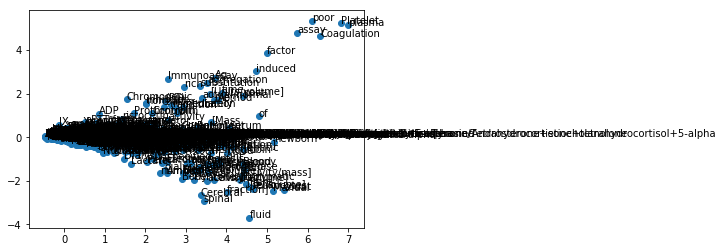

In [15]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot
# fit a 2d PCA model to the vectors
X = model[model.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [29]:
model.most_similar('creatinine',topn=5)

c:\users\dhivya\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('(C5:1)', 0.925041913986206),
 ('Thyroxine', 0.9219132661819458),
 ('Decenoylcarnitine', 0.9217734932899475),
 ('(E2)', 0.921708345413208),
 ('--upright', 0.92116779088974)]

In [23]:
w2v = dict(zip(model.wv.index2word, model.wv.syn0))

c:\users\dhivya\appdata\local\programs\python\python35\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  """Entry point for launching an IPython kernel.


In [24]:
import numpy as np

# Category -> words
data = {
  'Names': ['john','jay','dan','nathan','bob'],
  'Colors': ['yellow', 'red','green'],
  'Places': ['tokyo','bejing','washington','mumbai'],
}
# Words -> category
categories = {word: key for key, words in data.items() for word in words}

# Load the whole embedding matrix
embeddings_index = {}
with open('glove.6B.100d.txt') as f:
  for line in f:
    values = line.split()
    word = values[0]
    embed = np.array(values[1:], dtype=np.float32)
    embeddings_index[word] = embed
print('Loaded %s word vectors.' % len(embeddings_index))
# Embeddings for available words
data_embeddings = {key: value for key, value in embeddings_index.items() if key in categories.keys()}

# Processing the query
def process(query):
  query_embed = embeddings_index[query]
  scores = {}
  for word, embed in data_embeddings.items():
    category = categories[word]
    dist = query_embed.dot(embed)
    dist /= len(data[category])
    scores[category] = scores.get(category, 0) + dist
  return scores

# Testing
print(process('pink'))
print(process('frank'))
print(process('moscow'))

# data : glove : http://nlp.stanford.edu/data/glove.6B.zip

AttributeError: 'dict' object has no attribute 'predict'

None


[<div class="li_content">If you picked a test with a low sensitivity and your period is only a few days late, you may not be producing enough human chorionic <b>gonadotropin</b> (hCG) to trigger a positive result.</div>, <div class="li_content">AFP is often part of a triple-check blood test that analyzes three substances as risk indicators of possible birth defects: AFP, estriol, and human chorionic <b>gonadotropin</b> (HCG).</div>, <div class="li_content">It's called a triple screen because it looks for three substances in the blood: alpha-feto protein (AFP), human chorionic <b>gonadotropin</b> (HCG), and unconjugated estriol.</div>, <div class="li_content">It is up to 99 percent accurate from the first day of your missed period, provided you have detectable amounts of human chorionic <b>gonadotropin</b> (hCG) in your urine.</div>, <div class="li_content">After conception, the pregnancy hormone hCG (Human Chorionic <b>Gonadotropin</b>) secretes from the developing placenta after the e

If you picked a test with a low sensitivity and your period is only a few days late, you may not be producing enough human chorionic gonadotropin (hCG) to trigger a positive result.
AFP is often part of a triple-check blood test that analyzes three substances as risk indicators of possible birth defects: AFP, estriol, and human chorionic gonadotropin (HCG).
It's called a triple screen because it looks for three substances in the blood: alpha-feto protein (AFP), human chorionic gonadotropin (HCG), and unconjugated estriol.
It is up to 99 percent accurate from the first day of your missed period, provided you have detectable amounts of human chorionic gonadotropin (hCG) in your urine.
After conception, the pregnancy hormone hCG (Human Chorionic Gonadotropin) secretes from the developing placenta after the egg implants in the uterine lining.
First Response has created a test that can detect lower levels of the hormone hCG (human chorionic gonadotropin), also known as the pregnancy hormone